 ### <center> Quel est l'impact de la réduction de la vitesse sur la fréquence des embouteillages ? </center>
<center>LU2PY222 - Lyès HAMLAOUI - Thomas LETERTRE - Mai 2024</center>

<span style="font-size: 30px; font-weight: bold">Sommaire</span>

1. <a href="#Sec1"><span style="font-size: 20px;">Introduction</span></a>
2. <a href="#Sec2"><span style="font-size: 20px;">Modèle physique</span></a>
3. <a href="#Sec3"><span style="font-size: 20px;">Méthodes numériques</span></a>
4. <a href="#Sec4"><span style="font-size: 20px;">Conclusion</span></a>
5. <a href="#Sec4"><span style="font-size: 20px;">Annexe</span></a>


<br><br><br>

## Introduction

De nos jours, les embouteillages sont devenus un problème courant dans nos villes. Pour y remédier, une idée souvent évoquée est de réduire la vitesse sur les routes. Cependant, il existe des opinions divergentes sur l'efficacité réelle de cette mesure. Il est donc important d'examiner comment la réduction de la vitesse peut affecter la fréquence des embouteillages. En analysant cette question, nous pourrons mieux comprendre si cette solution est vraiment efficace pour améliorer la circulation en ville.

### Modèle Physique

Nous souhaitons définir un modèle physique et nous avons pas mal de choix, nous pouvons utiliser un modèle macroscopique, mais ce modèle risquerait de perdre des détails essentiels au niveau des particules individuelles (voiture), occultant ainsi des phénomènes locaux importants. De plus, il pourrait manquer de précision pour analyser les effets de conditions spécifiques ou de paramètres du système. En optant pour un modèle microscopique, nous pouvons mieux saisir ces détails et analyser précisément les effets des différentes conditions sur le système.

Si nous décidons de choisir un modèle microscopique, cela nous offre une représentation détaillée des interactions entre les particules individuelles, ce qui nous permets de comprendre les phénomènes subtils et locaux. Il permet également une analyse précise des effets de conditions initiales spécifiques ou de paramètres du système, tout en offrant une flexibilité pour explorer différentes conditions et "scénarios". Il permet alors une compréhension approfondie du système étudié.

Pour ces raisons, nous décidons de choisir un modèle microscopique de second ordre. Le modèle physique que nous allons examiner est une équation différentielle partielle discrète utilisée pour décrire la propagation des ondes dans un milieu. Plus précisément, cette équation modélise le comportement d'une chaîne de particules interconnectées, où chaque particule est soumise à une force qui dépend de la différence de déplacement entre elle-même et ses voisines. Cette équation est définie par l'équation suivante :

$M\frac{d}{dt} u_i (t) = \lambda [u_{i-1} (t-\tau) - u_i (t-\tau)], \forall t \ge \tau , i=2,...,N$

$(u_i)_i$ est l'ensemble des vitesses des $N$ véhicules, $M$ représente la masse supposée être identique entre tous ces véhicules, $\lambda$ est un coefficient donné et $\tau \ge 0$ un temps de retard (le même pour tous les conducteurs).

Nous considérons les véhicules de sorte que le véhicule $i-1$ est celui qui précéde le véhicule $i$. On décrit alors l'ensemble des positions des véhicules $(x_i)_i$ telles que 

$$ x_i(t)=\int_{0}^{t} u_i(s)ds$$  pour tout $i=1,.....,N, t>0$

De plus, on sait que $\dot{x}_i(t) = u_i(t)$ et nous définissons α : =$\frac{\lambda}{M}$
.
L’´equation s’ecrit alors

$$\ddot{x}_i(t)= \alpha [ \dot{x}_{i−1}(t − τ ) − \dot{x}_i(t − τ )] $$

Mais nous pouvons aussi l'integrer comme ceci :

$$\dot{x}_i(t)= \alpha [ {x}_{i−1}(t − τ ) − {x}_i(t − τ )] $$


Le schéma numérique sur les vitesses est définie comme tel : $U_i^{n+1} = U_i^n + \alpha \Delta t [U_{i-1}^{n-k} - U_i^{n-k}]$

Nous utiliserons ce schéma numérique au cours de nos experiences, mais nous allons d'abord voir la méthode numérique à utliser 

### Méthode numérique

Dans cette partie nous allons réaliser trois expériences, nous commencerons par étudier le comportement d'une dizaine voir d'une vingtaine de véhicule qui roule sur une route à une voie. Ensuite nous verrons le comportement de plusieurs véhicules sur deux voies et nous terminerons par une expérience autour d'un rond point que l'on modélisera. Avant cela, nous devons déjà importer les modules nécéssaires.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Route à une voie limité à 30 km\h

Nous allons modéliser le trafic au sein d'une route à sens unique limité à 30km\h. Le but est de voir le comportement des autres usagers et de comprendre comment ils s'adaptent à la circulation. Pour commencer, on initialisation les paramètres de simulation tels que le nombre de véhicules, le coefficient d'adaptation de vitesse $\alpha$, et le temps de retard $\tau$.

In [10]:
# Paramètres
N_voitures = 20  # Nombre de véhicules
alpha = 0.1  # Coefficient alpha
tau = 1  # Temps de retard

Nous définissions alpha comme 0.1 pour avoir un coefficient réaliste, plus il augmente et se rapproche de 1 et plus la simulation devient instable. A l'inverse, plus il est petit et plus les efffets désirés de la simualtion se produisent lentement, alors la vlaluer de $0.1$ semble la plus correcte.

On introduit désormais d'autres paramètres et aussi une discrétisation régulière du temps, avec un pas numérique fixe noté $∆t$ tel que 0 < $∆t$ < $τ$ . Afin de simplifier les calculs, nous choisissons ce pas de telle façon que
∃ k ∈ N : $τ = k∆t$.

In [16]:
# Pas de temps et instants t
pas = 0.5  # Pas de temps
t = np.arange(0,300,pas)/10  # Instants t

# Calcul de k tel que τ = k∆t
k = int(tau / pas)

# Définir la plage de vitesses initiales
U_init_min = 20
U_init_max = 30

Nous avons divisé $t$ par 10 pour avoir un aspect plus réaliste. On peut désormais faire une liste pour stocker les valeurs des véhicule, nous allons mettre le premier véhicule à une vitesse constante de 30km\h de manière volontaire et nous prenons des valeurs aléatoire entre 20 km\h et 30km\h pour le reste des véhicules.

In [18]:
# Création de la liste des vitesses U_1 du véhicule 1

U_1 = [30 for i in range(len(t))]
dic_U = {1: U_1}


# Création des listes des vitesses U_i des véhicules suivants

U_prec = U_1
for i in range(2, N_voitures + 1):

    U_i = [np.random.uniform(U_init_min, U_init_max)]
    U_i = U_i * 3
    for n in range(3,len(t)):
        U_i.append(U_i[n-1] + alpha * pas * (U_prec[n-1-k] - U_i[n-1-k]))
        
    U_prec = U_i
    dic_U[i] = U_i

df_U = pd.DataFrame(data = dic_U)
df_U.columns = ["U_"+str(j) for j in range(1, N_voitures + 1)] 

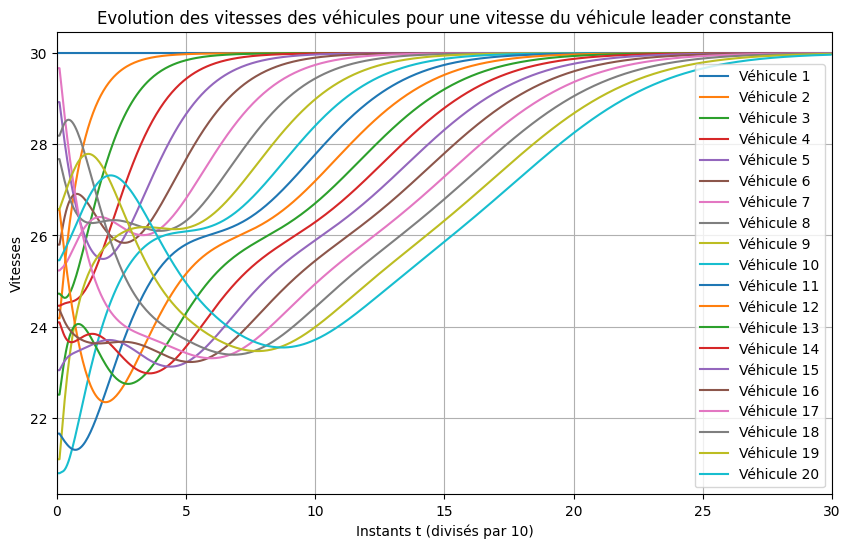

In [19]:
# Représentation des vitesses des véhicules au cours du temps pour une vitesse du véhicule leader constante

plt.figure(figsize=(10, 6))
for i in range(1, N_voitures + 1):
    plt.plot(t, dic_U[i], label=f"Véhicule {i}")
    plt.xlim(0,30)
    
plt.title("Evolution des vitesses des véhicules pour une vitesse du véhicule leader constante")
plt.xlabel("Instants t (divisés par 10)")
plt.ylabel("Vitesses")
plt.legend()
plt.grid()
plt.show()

Dans notre graphique, on constate que lorsque le premier véhicule roulent à une allure normal, ici à 30km\h qui est la vitesse maximal autorisé. On a un trafic qui est assez fluide, les véhicules qui étaient à une vitesse basse se mettent à accélérer au point d'être à la même vitesse que le premier véhicule, mais tout en respectant les distances de sécurité. Cela pourrait réduire le risque de congestion en encourageant les autres véhicules à maintenir des vitesses plus élevées. Cependant, cela pourrait également augmenter le risque d'accidents en raison de vitesses plus élevées, ce qui nécessiterait une conduite prudente pour éviter les collisions et les ralentissements brusques. On peut supposer que la manière de gérer la vitesse est un facteur important pour avoir un trafic fluide ? 

Nous allons désormais imaginer un autre cas, on peut se demander ce qui se passerait si le premier véhicule serait à 20 km\h sur cette même route. Pour ce faire, nous sommes obligés de reprendre le même script avec comme seule différence la valeurs du premier véhicule qui est à 20km\h

In [23]:
# Création de la liste des vitesses U_1 du véhicule 1 avec la vitesse modifié

U_1 = [20 for i in range(len(t))]
dic_U = {1: U_1}


# Création des listes des vitesses U_i des véhicules suivants

U_prec = U_1
for i in range(2, N_voitures + 1):

    U_i = [np.random.uniform(U_init_min, U_init_max)]
    U_i = U_i * 3
    for n in range(3,len(t)):
        U_i.append(U_i[n-1] + alpha * pas * (U_prec[n-1-k] - U_i[n-1-k]))
        
    U_prec = U_i
    dic_U[i] = U_i

df_U = pd.DataFrame(data = dic_U)
df_U.columns = ["U_"+str(j) for j in range(1, N_voitures + 1)] 

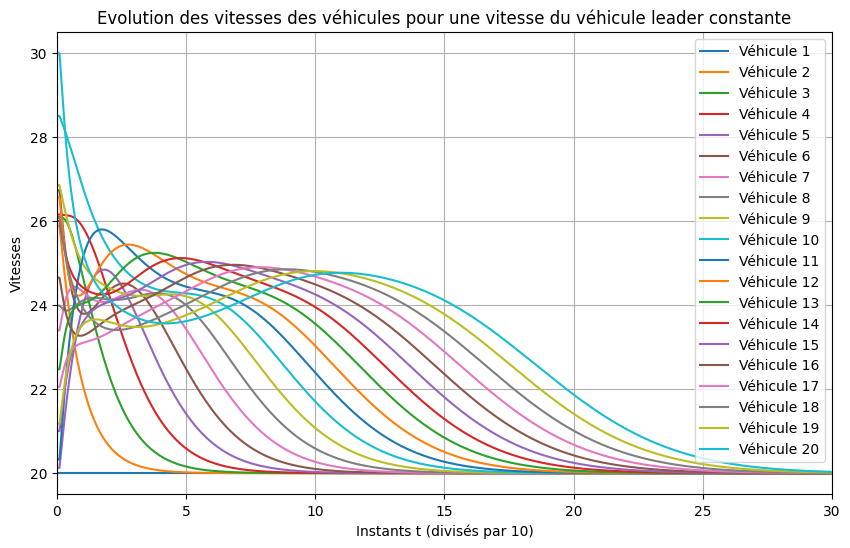

In [24]:
# Représentation des vitesses des véhicules au cours du temps pour une vitesse du véhicule leader constante

plt.figure(figsize=(10, 6))
for i in range(1, N_voitures + 1):
    plt.plot(t, dic_U[i], label=f"Véhicule {i}")
    plt.xlim(0,30)
    
plt.title("Evolution des vitesses des véhicules pour une vitesse du véhicule leader constante")
plt.xlabel("Instants t (divisés par 10)")
plt.ylabel("Vitesses")
plt.legend()
plt.grid()
plt.show()

En fixant la vitesse initiale du premier véhicule à 20 km/h, nous avons observé que les autres véhicules ont tendance à s'aligner sur cette vitesse en un laps de temps (quelques secondes). Cela s'explique par le fait que les véhicules suivants ajustent leur vitesse pour maintenir une distance de sécurité avec le véhicule précédent, ce qui peut les amener à adopter une vitesse plus proche de celle du premier véhicule. Cependant, avoir une vitesse trop basse pourrait être dangereux, imaginons qu'un véhicule serait arriver trop vite, peut-être n'aurait il pas eu le temps de freiner à temps.

Ainsi, nous pouvons conclure que cela exerce une influence sur le comportement global du trafic, incitant les autres véhicules à converger vers cette vitesse. Cette observation souligne l'importance de la vitesse initiale d'un véhicule dans la dynamique du trafic et met en évidence le phénomène d'alignement des vitesses entre les véhicules sur une route à voie unique.

Cela peut potentiellement contribuer à la formation de bouchons. Lorsque tous les véhicules tendent à converger vers une vitesse similaire, en l'occurrence la vitesse initiale du premier véhicule fixée à 20 km/h dans notre simulation, cela peut entraîner une diminution de la fluidité du trafic. 

Nos deux graphiques souligne donc l'importance de la gestion efficace de la vitesse et de la distance entre les véhicules pour prévenir les bouchons et maintenir un flux de trafic fluide sur les routes. Avoir une vitesse trop basse ralentit le trafic et peu initailiser un bouchon en cas de trafic elevé.

Nous pouvons donc mettre en place des stratégies telles que le contrôle de la vitesse, le maintien d'une distance de sécurité adéquate et une conduite attentive peuvent contribuer à réduire le risque de bouchon et à améliorer la sécurité routière.

Nous allons désormais nous pencher sur le cas du trafic routier sur une autoroute à deux voies

### Autoroute avec changement de voie

Nous passons désormais sur une autoroute que nous allons limité à 110 km\h. Nous reprenons ce que nous avon fait précédemment, mais cette fois-ci nous allons ajouter d'autres conditions. En modélisant le trafic sur une autoroute on veut essayer de comprendre quel est l'imact du ralentissement, de la réduction de vitesse sur l'apparition d'embouteillage. Pour cela, on commence par l'ajout des paramètres:

In [27]:

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_voitures = 20  # Nombre de véhicules par voie
alpha = 0.1  # Coefficient alpha
tau = 1  # Temps de retard
vmax_highway = 110  # Limite de vitesse sur l'autoroute (km/h)

In [28]:
# Pas de temps et instants t
pas = 0.5  # Pas de temps
t = np.arange(0, 300, pas)  # Instants t

# Calcul de k tel que τ = k∆t
k = int(tau / pas)

# Définir la plage de vitesses initiales
U_init_min = 90
U_init_max = 110

# Création des listes des vitesses U_i des véhicules pour chaque voie
dic_U_left = {}
dic_U_right = {}

De plus, comparer à ce qu'on a fait à la partie précédente, nous allons ici créer deux voies, pour cela on fait des listes

In [29]:
# Création des vitesses pour la voie de gauche
U_1_left = [110 for _ in range(len(t))]
dic_U_left[1] = U_1_left

U_prec_left = U_1_left
for i in range(2, N_voitures + 1):
    U_i_left = [np.random.uniform(U_init_min, U_init_max)]
    U_i_left = U_i_left * 3
    for n in range(3, len(t)):
        U_i_left.append(U_i_left[n-1] + alpha * pas * (U_prec_left[n-1-k] - U_i_left[n-1-k]))
    U_prec_left = U_i_left
    dic_U_left[i] = U_i_left

On fait la même chose pour la voie de droite

In [30]:

# Création des vitesses pour la voie de droite
U_1_right = [90 for _ in range(len(t))]
dic_U_right[1] = U_1_right

U_prec_right = U_1_right
for i in range(2, N_voitures + 1):
    U_i_right = [np.random.uniform(U_init_min, U_init_max)]
    U_i_right = U_i_right * 3
    for n in range(3, len(t)):
        U_i_right.append(U_i_right[n-1] + alpha * pas * (U_prec_right[n-1-k] - U_i_right[n-1-k]))
    U_prec_right = U_i_right
    dic_U_right[i] = U_i_right


Désormais nous ajoutons la possibilité pour les véhicules de droite de dépasser mais ceux de gauche ne peuvent pas puisque nous sommes sur deux voies.

In [31]:
depassements_left = set()
depassements_right = set()

On utilise la méthode de Euler pour faire une boucle

In [32]:
for j in range(1, len(t)):
    for i in range(2, N_voitures):
        if dic_U_right[i][j] > dic_U_right[i-1][j] and dic_U_left[i][j] >= dic_U_left[i-1][j] and dic_U_left[i][j] <= dic_U_right[i-1][j]:
            dic_U_left[i][j] = vmax_highway
            dic_U_right[i][j] = vmax_highway - 10
            depassements_left.add(j)
        if dic_U_left[i][j] > dic_U_left[i-1][j]:
            if dic_U_left[i][j] > dic_U_right[i-1][j]:
                dic_U_right[i-1][j] = vmax_highway
                dic_U_left[i-1][j] = vmax_highway - 10
                depassements_right.add(j)

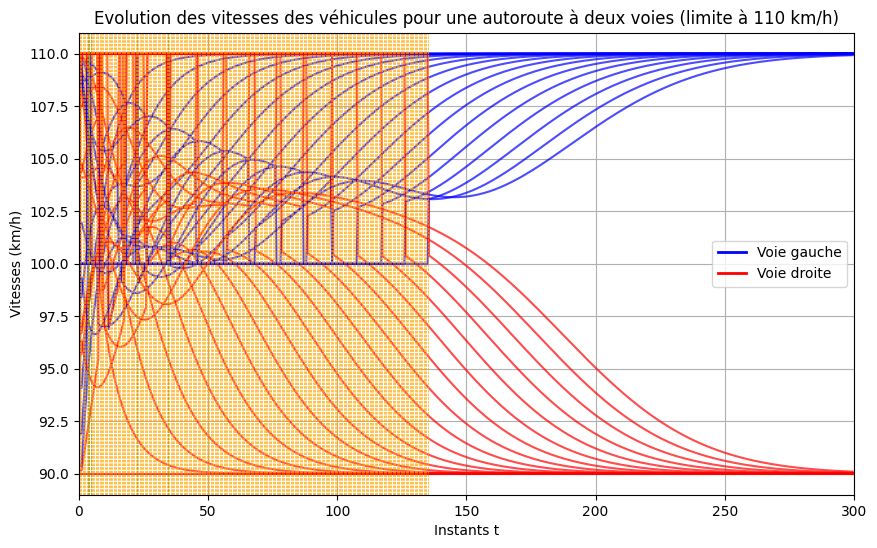

In [35]:
plt.figure(figsize=(10, 6))
for i in range(1, N_voitures + 1):
    plt.plot(t, dic_U_left[i], label=f"Voie gauche - Véhicule {i}", color='b', alpha=0.7)
    plt.plot(t, dic_U_right[i], label=f"Voie droite - Véhicule {i}", color='r', alpha=0.7)
    plt.xlim(0, 300)

# Marquage des dépassements
for instant in depassements_left:
    plt.axvline(x=instant * pas, color='g', linestyle='--', linewidth=0.5)
for instant in depassements_right:
    plt.axvline(x=instant * pas, color='orange', linestyle='--', linewidth=0.5)

# Création de légendes distinctes pour les voitures de gauche et de droite
legend_left = plt.Line2D([0], [0], color='b', linewidth=2, linestyle='-')
legend_right = plt.Line2D([0], [0], color='r', linewidth=2, linestyle='-')

plt.title("Evolution des vitesses des véhicules pour une autoroute à deux voies (limite à 110 km/h)")
plt.xlabel("Instants t")
plt.ylabel("Vitesses (km/h)")

# Ajout des légendes
plt.legend([legend_left, legend_right], ['Voie gauche', 'Voie droite'])

plt.grid()

# Modifier les valeurs de l'axe x
plt.xticks(np.arange(0, 301, 50))

plt.show()


Nous avons représenter en orange les dépassements des véhicules, que ce soit sur la voie de droite ou de gauche, nous avons presques constamment des dépassemments et des vehicules qui se replacent. Sur le graphique, on constate des changements brusques de vitesses, ainsi que des accélérations soudaines. Ces réductions brusques de vitesses pourrait être la cause des embouteillages, imaginons si il y avait plusieurs dizaines de véhicules derrière, cela ferait l'effet d'une onde qui se propage provoquant une réaction à la chaine.

Nous pourrions aussi essayer de voir cette effet à la chaine en modélisant un rond point ou une route finit.

### Rond point

Après avoir explorer les simulations de trafic routier sur une voie unique et sur une autoroute, nous allons maintenant nous plonger dans une expérience différente : la circulation de 10 véhicules à des distances égales autour d'un rond-point. Cette expérience nous permettra d'étudier la dynamique de la circulation dans un environnement circulaire, où les véhicules suivent une trajectoire continue sans changer de voie. En observant comment ces véhicules interagissent dans un tel contexte, nous pourrons mieux comprendre comment les bouchons se forment, mais aussi la manière dont les flux continu régissent la circulation.

Nous souhaitons d'abord modéliser le rond point ou nous placerons les véhicules à des intervalles équidistants les uns des autres, mais commençons par les paramètres

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N = 10  # Nombre de véhicules
radius = 15  # Rayon du rond-point en mètres
speed_kmh = 30  # Vitesse des véhicules en km/h
dt = 0.1  # Pas de temps en secondes
t_max = 120  # Durée de la simulation en secondes

On initialise les positions des véhicules comme voulut

In [41]:
# Calcul de la circonférence du rond-point
circumference = 2 * np.pi * radius

# Calcul de l'espacement équidistant des véhicules
spacing = circumference / N

# Initialisation des positions des véhicules équidistantes sur le rond-point
positions = np.arange(0, circumference, spacing)

# Liste pour stocker les positions des véhicules à chaque pas de temps
positions_history = [positions.copy()]

On fait ensuite une boucle temporelle et nous pourrons visualiser le résultat

In [42]:
# Boucle temporelle
for t in np.arange(dt, t_max, dt):
    # Déplacement des véhicules en fonction de leur vitesse constante
    positions += (speed_kmh / 3.6) * dt  # Conversion de la vitesse en m/s
    
    # Gestion du dépassement de la circonférence du rond-point
    positions = positions % circumference
    
    # Enregistrement des positions dans l'historique
    positions_history.append(positions.copy())

# Conversion des positions en angles
angles = positions / radius

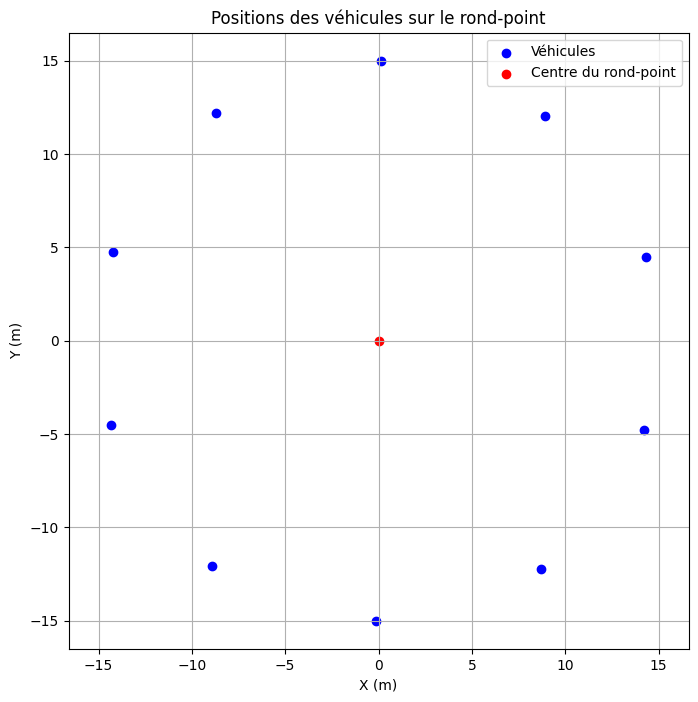

In [44]:
# Visualisation des positions des véhicules sur le rond-point
plt.figure(figsize=(8, 8))
plt.title("Positions des véhicules sur le rond-point")
plt.scatter(radius * np.sin(angles), radius * np.cos(angles), label="Véhicules", color='blue')
plt.scatter(0, 0, label="Centre du rond-point", color='red')
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


Pour réaliser notre experience nous allons faire tourner les véhicules autour du rond point à 30km\h, ensuite le véhicule 1 devra décélerer à 10km\h pendant quelques secondes et réaccellera après pour atteindre sa vitesse initiale, le but est de voir l'impact de la conduite du véhicule 1 au sein du trafic autour du rond point.

On redéfinit alors les paramètres et on ajoute le ralentissement ainsi que la réacceleration du véhicule 1 qui va alors impacter le reste des vehicule en les forcant à ralentir

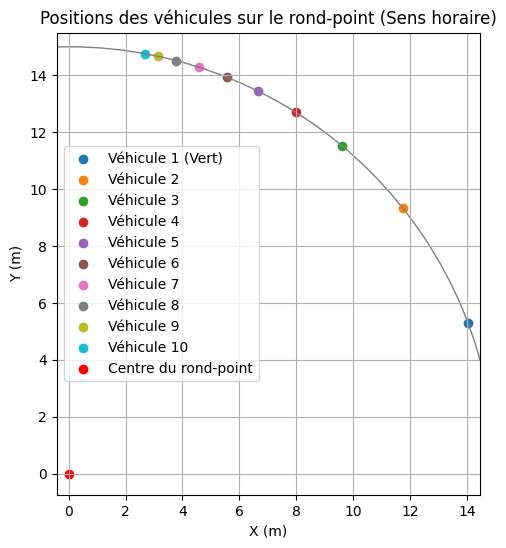

In [53]:
# Paramètres
N = 10  # Nombre de véhicules
radius = 15  # Rayon du rond-point en mètres
speed_kmh = 30  # Vitesse des véhicules en km/h
initial_slow_speed_kmh = 10  # Vitesse initiale réduite de la première voiture en km/h
slow_duration = 5  # Durée pendant laquelle la première voiture ralentit en secondes
acceleration_duration = 5  # Durée pendant laquelle la première voiture accélère en secondes
alpha = 1.0  # Coefficient de décélération pour le ralentissement et l'accélération
dt = 0.25  # Pas de temps en secondes
t_max = slow_duration + acceleration_duration + 1  # Durée totale de la simulation en secondes (+1 secondes supplémentaires)

# Calcul de la circonférence du rond-point
circumference = 2 * np.pi * radius

# Calcul des espacements équidistants des véhicules en fonction de leur vitesse
spacing = (speed_kmh / 3.6) * dt  # Espacement équidistant basé sur la vitesse constante

# Initialisation des positions des véhicules avec des espacements basés sur la vitesse
positions = np.arange(0, N * spacing, spacing)

# Réduction de la vitesse initiale de la première voiture
positions[0] = 0  # Position initiale de la première voiture à l'origine

# Liste pour stocker les positions des véhicules à chaque pas de temps
positions_history = [positions.copy()]

# Liste pour stocker les vitesses des véhicules à chaque pas de temps
speeds_history = []

# Boucle temporelle
for t in np.arange(dt, t_max, dt):
    # Copie temporaire des positions pour calculer les mises à jour
    positions_temp = positions.copy()
    
    # Ralentissement de la première voiture à 10 km/h pendant quelques secondes
    if t < slow_duration:
        # Application de l'équation de décélération pour le ralentissement
        positions_temp[0] -= alpha * dt * (positions_temp[0] - positions_temp[1])
    elif t < slow_duration + acceleration_duration:
        # Réaccélération progressive de la première voiture jusqu'à sa vitesse normale
        positions_temp[0] += alpha * dt * (initial_slow_speed_kmh / 3.6 - (positions_temp[0] - positions_temp[1]))
    else:
        # Vitesse normale de la première voiture
        positions_temp[0] += (speed_kmh / 3.6) * dt
    
    # Adaptation de la vitesse des autres véhicules en fonction de la vitesse du véhicule précédent
    for i in range(1, N):
        positions_temp[i] -= alpha * dt * (positions_temp[i] - positions_temp[i-1])
    
    # Mise à jour des positions
    positions = positions_temp
    
    # Enregistrement des positions dans l'historique
    positions_history.append(positions.copy())
    
    # Enregistrement de la vitesse de chaque véhicule
    speeds = (positions[0] - positions[-1]) / dt
    speeds_history.append(speeds)

# Calcul de la vitesse finale des véhicules
final_speeds = [(positions_history[-1][i] - positions_history[-2][i]) / dt for i in range(N)]


# Conversion des positions en angles
angles = positions / radius

# Affichage graphique
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Positions des véhicules sur le rond-point (Sens horaire)")
for i in range(N):
    if i == 0:
        plt.scatter(radius * np.sin(angles[i]), radius * np.cos(angles[i]), label=f"Véhicule {i+1} (Vert)")
    else:
        plt.scatter(radius * np.sin(angles[i]), radius * np.cos(angles[i]), label=f"Véhicule {i+1}")

circle = plt.Circle((0, 0), radius, color='gray', fill=False)
plt.gca().add_artist(circle)  # Ajout du cercle représentant le rond-point

plt.scatter(0, 0, label="Centre du rond-point", color='red')
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.axis('equal')
plt.legend()
plt.grid(True)

Nous sommes juste après la reprise du véhicule 1, on voit que tout les véhicules ont été obligés de ralentir pour ne pas entrer en collision entre eux. Le ralentissement du premier vehicule a donc créer une version miniature d'un bouchon même si il a duré quelques secondes, on peut tout de même voir ce qu'il se passe en augmentant $t_{max}$

Nous sommes dans l'obligation de reécrire le script et d'ajouter des fonctions

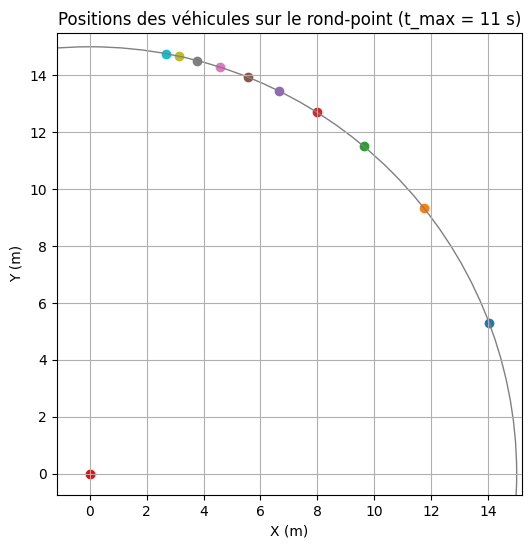

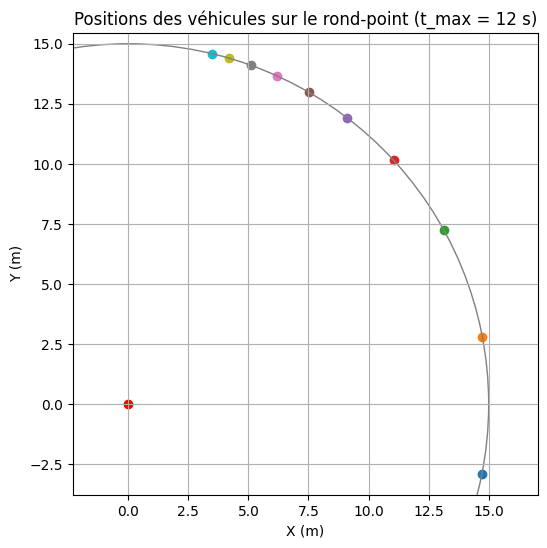

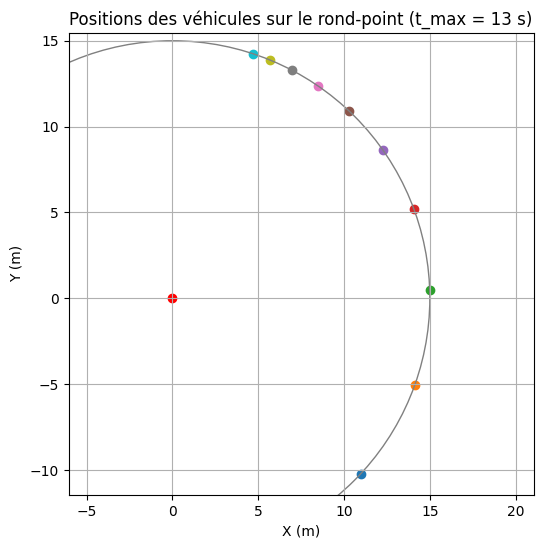

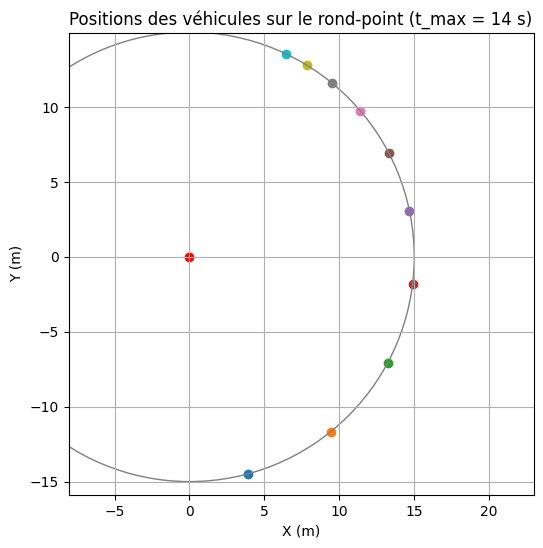

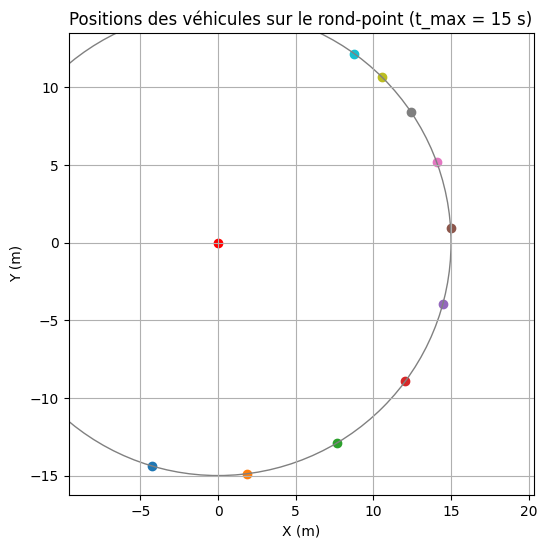

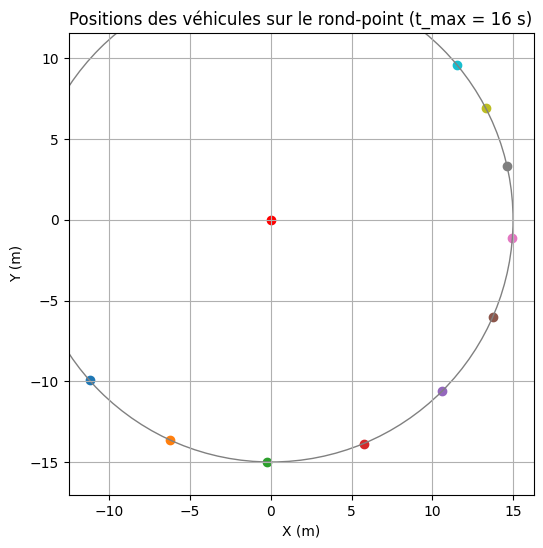

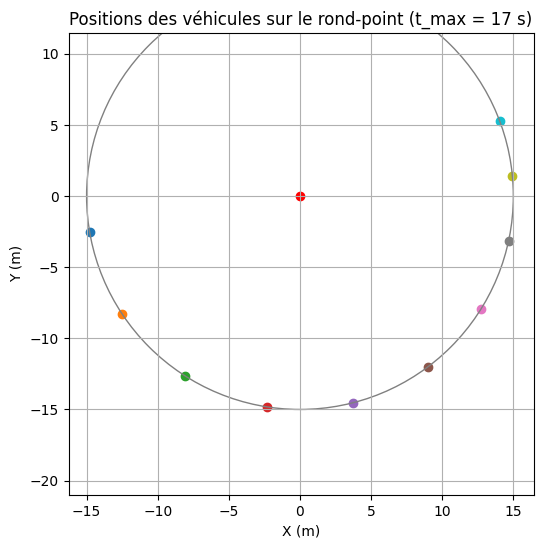

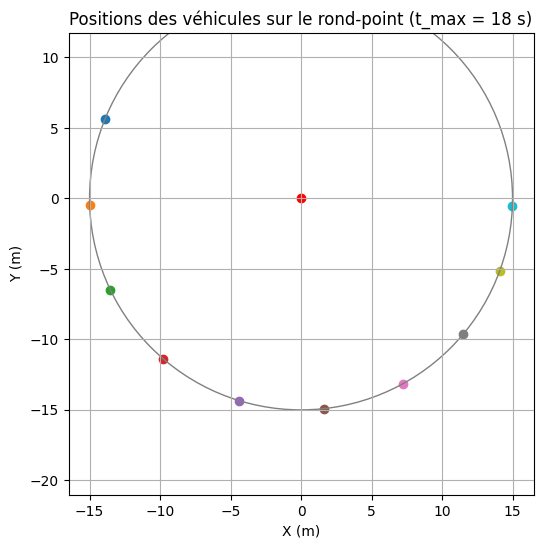

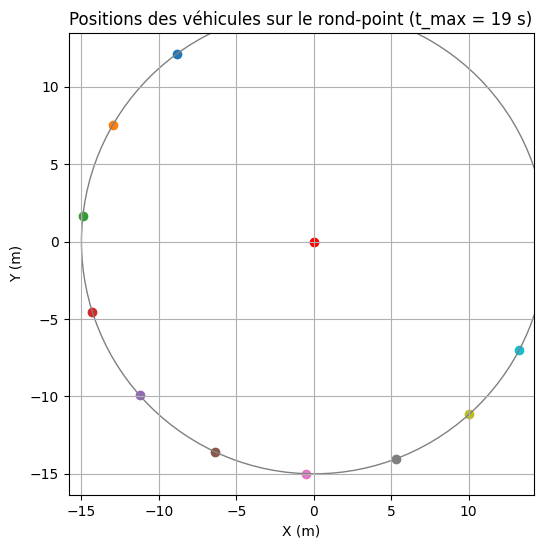

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres constants
N = 10  # Nombre de véhicules
radius = 15  # Rayon du rond-point en mètres
speed_kmh = 30  # Vitesse des véhicules en km/h
initial_slow_speed_kmh = 10  # Vitesse initiale réduite de la première voiture en km/h
slow_duration = 5  # Durée pendant laquelle la première voiture ralentit en secondes
acceleration_duration = 5  # Durée pendant laquelle la première voiture accélère en secondes
alpha = 1.0  # Coefficient de décélération pour le ralentissement et l'accélération
dt = 0.25  # Pas de temps en secondes

# Fonction pour simuler et tracer les positions des véhicules
def simulate_and_plot(t_max):
    # Calcul de t_max basé sur la durée de ralentissement et d'accélération
    t_max = slow_duration + acceleration_duration + t_max
    
    # Calcul de la circonférence du rond-point
    circumference = 2 * np.pi * radius

    # Calcul des espacements équidistants des véhicules en fonction de leur vitesse
    spacing = (speed_kmh / 3.6) * dt  # Espacement équidistant basé sur la vitesse constante

    # Initialisation des positions des véhicules avec des espacements basés sur la vitesse
    positions = np.arange(0, N * spacing, spacing)

    # Réduction de la vitesse initiale de la première voiture
    positions[0] = 0  # Position initiale de la première voiture à l'origine

    # Liste pour stocker les positions des véhicules à chaque pas de temps
    positions_history = [positions.copy()]

    # Boucle temporelle
    for t in np.arange(dt, t_max, dt):
        # Copie temporaire des positions pour calculer les mises à jour
        positions_temp = positions.copy()
        
        # Ralentissement de la première voiture à 10 km/h pendant quelques secondes
        if t < slow_duration:
            # Application de l'équation de décélération pour le ralentissement
            positions_temp[0] -= alpha * dt * (positions_temp[0] - positions_temp[1])
        elif t < slow_duration + acceleration_duration:
            # Réaccélération progressive de la première voiture jusqu'à sa vitesse normale
            positions_temp[0] += alpha * dt * (initial_slow_speed_kmh / 3.6 - (positions_temp[0] - positions_temp[1]))
        else:
            # Vitesse normale de la première voiture
            positions_temp[0] += (speed_kmh / 3.6) * dt
        
        # Adaptation de la vitesse des autres véhicules en fonction de la vitesse du véhicule précédent
        for i in range(1, N):
            positions_temp[i] -= alpha * dt * (positions_temp[i] - positions_temp[i-1])
        
        # Mise à jour des positions
        positions = positions_temp
        
        # Enregistrement des positions dans l'historique
        positions_history.append(positions.copy())

    # Conversion des positions en angles
    angles = positions / radius

    # Affichage graphique
    plt.figure(figsize=(6, 6))
    plt.title(f"Positions des véhicules sur le rond-point (t_max = {t_max} s)")
    for i in range(N):
        if i == 0:
            plt.scatter(radius * np.sin(angles[i]), radius * np.cos(angles[i]), label=f"Véhicule {i+1} (Vert)")
        else:
            plt.scatter(radius * np.sin(angles[i]), radius * np.cos(angles[i]), label=f"Véhicule {i+1}")

    circle = plt.Circle((0, 0), radius, color='gray', fill=False)
    plt.gca().add_artist(circle)  # Ajout du cercle représentant le rond-point

    plt.scatter(0, 0, label="Centre du rond-point", color='red')
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Simulation et tracé pour différentes valeurs de t_max
for t_max_value in range(1, 10):  # Valeurs de t_max de 1 à 5 secondes
    simulate_and_plot(t_max_value)


La première voiture est toujours celle en bleu foncé et le rond point est le point rouge au centre. Au bout de 19 secondes de simulation, on voit que le trafic a repris mais on constate que le véhicule 1 et 10 ne sont pas a équidistances à cause du ralentissement du trafic. Cependant on peut se demander si l'on aurait pas un ralentissement constant du trafic dans le rond point si l'on augmentait le nombre de véhicule ? 

Pour cela, on ajoute 10 véhicules supplémentaire et on regarde le résultat. Nous précisons que les véhicules tournent bien dans le sens horaire des aiguilles d'une montre

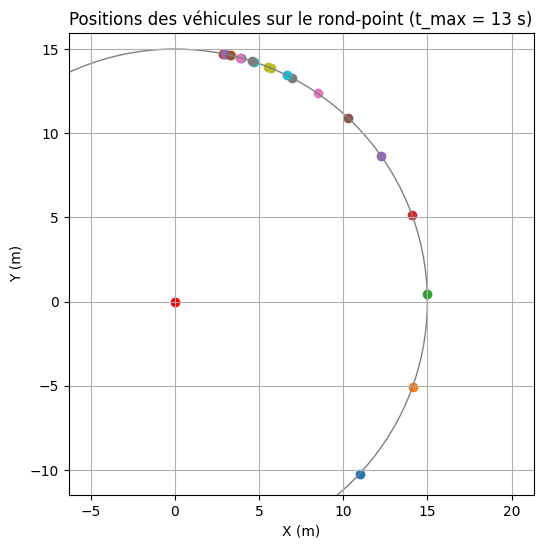

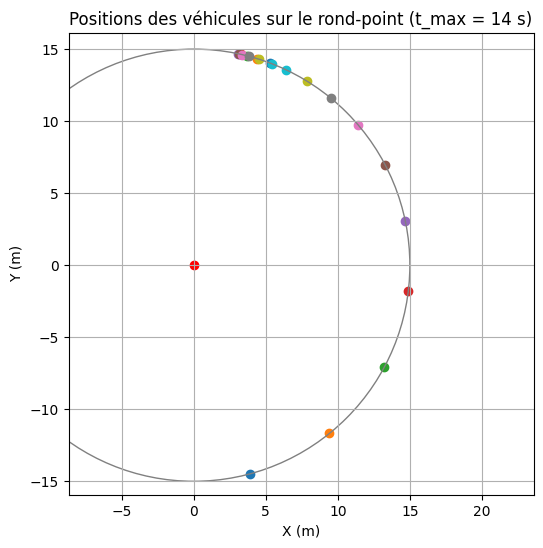

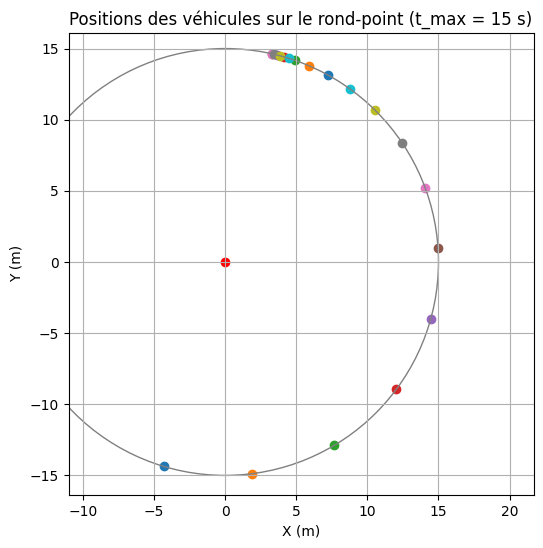

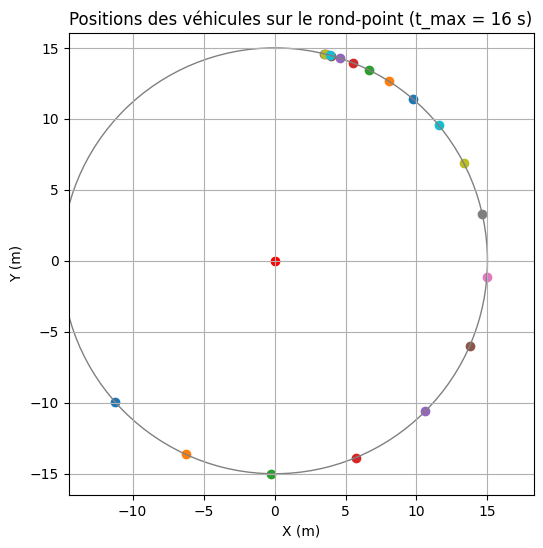

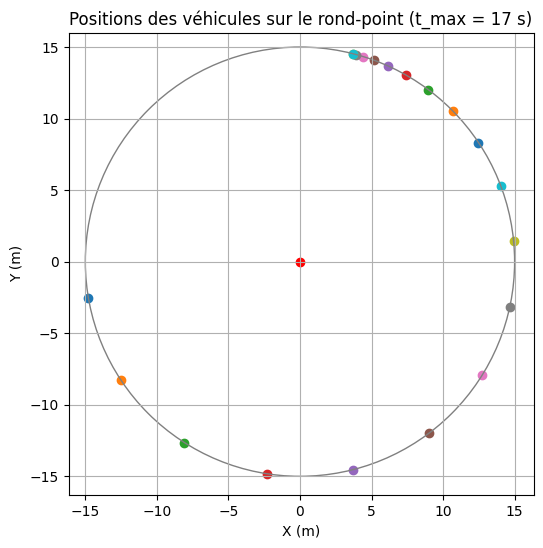

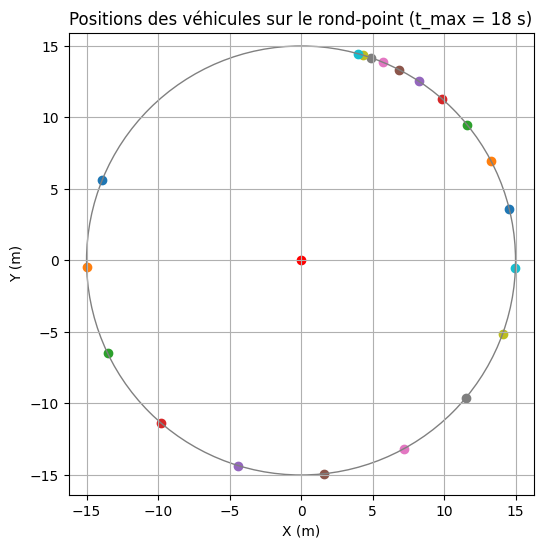

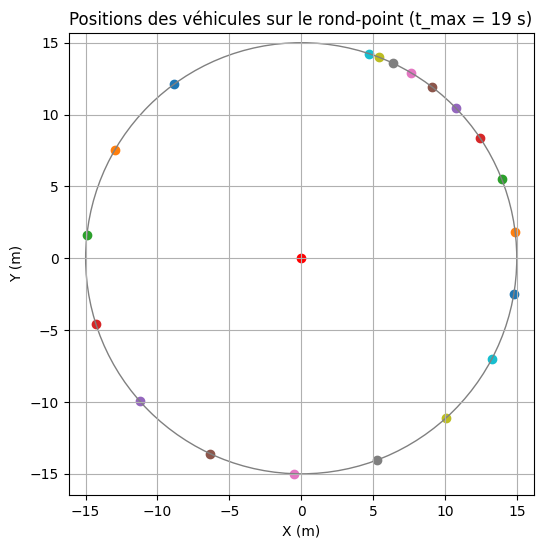

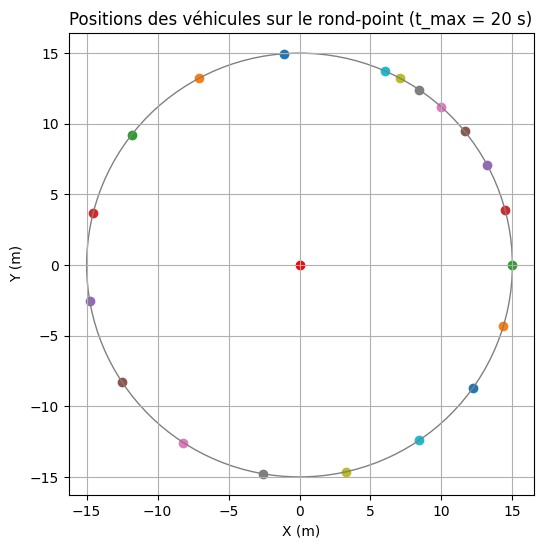

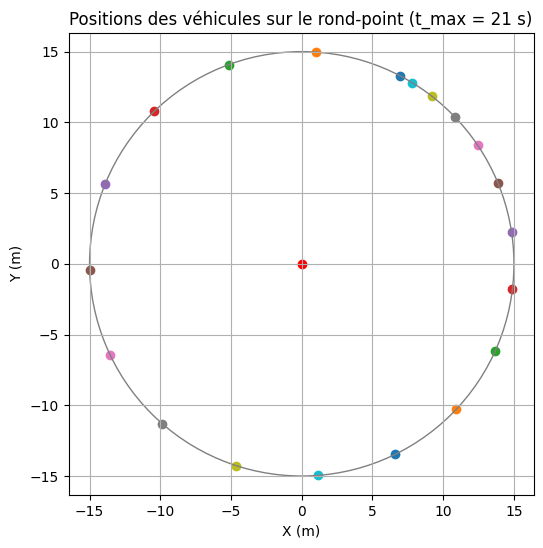

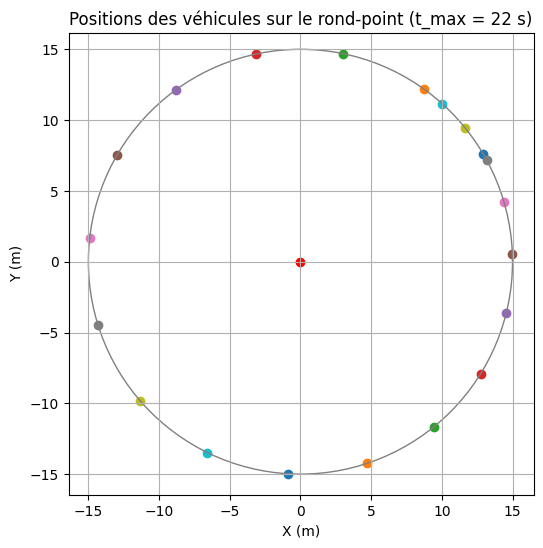

In [67]:
# Paramètres constants
N = 20  # Nombre de véhicules
radius = 15  # Rayon du rond-point en mètres
speed_kmh = 30  # Vitesse des véhicules en km/h
initial_slow_speed_kmh = 10  # Vitesse initiale réduite de la première voiture en km/h
slow_duration = 5  # Durée pendant laquelle la première voiture ralentit en secondes
acceleration_duration = 5  # Durée pendant laquelle la première voiture accélère en secondes
alpha = 1.0  # Coefficient de décélération pour le ralentissement et l'accélération
dt = 0.25  # Pas de temps en secondes

# Fonction pour simuler et tracer les positions des véhicules
def simulate_and_plot(t_max):
    # Calcul de t_max basé sur la durée de ralentissement et d'accélération
    t_max = slow_duration + acceleration_duration + t_max
    
    # Calcul de la circonférence du rond-point
    circumference = 2 * np.pi * radius

    # Calcul des espacements équidistants des véhicules en fonction de leur vitesse
    spacing = (speed_kmh / 3.6) * dt  # Espacement équidistant basé sur la vitesse constante

    # Initialisation des positions des véhicules avec des espacements basés sur la vitesse
    positions = np.arange(0, N * spacing, spacing)

    # Réduction de la vitesse initiale de la première voiture
    positions[0] = 0  # Position initiale de la première voiture à l'origine

    # Liste pour stocker les positions des véhicules à chaque pas de temps
    positions_history = [positions.copy()]

    # Boucle temporelle
    for t in np.arange(dt, t_max, dt):
        # Copie temporaire des positions pour calculer les mises à jour
        positions_temp = positions.copy()
        
        # Ralentissement de la première voiture à 10 km/h pendant quelques secondes
        if t < slow_duration:
            # Application de l'équation de décélération pour le ralentissement
            positions_temp[0] -= alpha * dt * (positions_temp[0] - positions_temp[1])
        elif t < slow_duration + acceleration_duration:
            # Réaccélération progressive de la première voiture jusqu'à sa vitesse normale
            positions_temp[0] += alpha * dt * (initial_slow_speed_kmh / 3.6 - (positions_temp[0] - positions_temp[1]))
        else:
            # Vitesse normale de la première voiture
            positions_temp[0] += (speed_kmh / 3.6) * dt
        
        # Adaptation de la vitesse des autres véhicules en fonction de la vitesse du véhicule précédent
        for i in range(1, N):
            positions_temp[i] -= alpha * dt * (positions_temp[i] - positions_temp[i-1])
        
        # Mise à jour des positions
        positions = positions_temp
        
        # Enregistrement des positions dans l'historique
        positions_history.append(positions.copy())

    # Conversion des positions en angles
    angles = positions / radius

    # Affichage graphique
    plt.figure(figsize=(6, 6))
    plt.title(f"Positions des véhicules sur le rond-point (t_max = {t_max} s)")
    for i in range(N):
        if i == 0:
            plt.scatter(radius * np.sin(angles[i]), radius * np.cos(angles[i]), label=f"Véhicule {i+1} (Vert)")
        else:
            plt.scatter(radius * np.sin(angles[i]), radius * np.cos(angles[i]), label=f"Véhicule {i+1}")

    circle = plt.Circle((0, 0), radius, color='gray', fill=False)
    plt.gca().add_artist(circle)  # Ajout du cercle représentant le rond-point

    plt.scatter(0, 0, label="Centre du rond-point", color='red')
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Simulation et tracé pour différentes valeurs de t_max
for t_max_value in range(3, 13):  # Valeurs de t_max de 1 à 5 secondes
    simulate_and_plot(t_max_value)


Dans cette disposition, nous remarquons encore une fois que les véhicules repartent au fur et à mesure après le ralentissement du véhicule 1. Cette fois-ci, le premier véhicule arrive à hauteur du dernier vehicule à environ 30km\h tandis que ce dernier est seulement en train de repartir. On constate que le dernier graphe une accumulation de véhicule en haut à gauche qui est censé être synonyme de bouchon. Normalement le premier véhicule devrait ralentir ainsi que le second, puis le troisième jusqu'a que revienne le dernier véhicule et qu'il doit aussi ralentir. Le ralentissment du premier véhicule à enfaite crée un bouchon qui est continue, il se repand telle une onde. Cependant, nous n'avons pas réussi à modéliser cela, lorsque nous essayons les véhicules suivaient simplement le véhicule 1 et ne restait à equidistance et il n'y avait plus aucune variation de vitesse. Malheureusement les véhicules se chevauchent mais normalement nous devrions apercevoir une réaction en chaine au sein des vehicules, un bouchon  où quelques véhicules seraient impliqués et à chaque fois qu'un véhicule sort de ce bouchon, un autre entre. 

Alors le ralentissement du véhicule 1 suivi de sa réaccélération et de son placement derrière le dernier véhicule crée un effet de ralentissement localisé, forçant les véhicules suivants à réduire leur vitesse pour maintenir une distance de sécurité. Cette série de décélérations crée une onde de choc dans le trafic, se propageant vers l'arrière le long de la file de véhicules. Lorsque le véhicule 1 reprend sa vitesse normale et se retrouve derrière le véhicule 10, cela aggrave cet effet, entraînant des accélérations et des décélérations fréquentes qui augmentent la consommation de carburant et les émissions polluantes. De plus, ces conditions de conduite chaotiques peuvent accroître le risque d'accidents, augmentant ainsi les dangers pour les conducteurs et les passagers. En conséquence, il est crucial de mettre en œuvre des mesures de gestion du trafic efficaces pour atténuer ces effets et améliorer la fluidité et la sécurité de la circulation.

## Conclusion

Nous avons mis en place trois expérience qui nous ont permis de comprendre l'impact de la réduction de vitesse sur les embouteillages. Pour la première expériences, on a vu que lorsque le premier véhicule était à 30km\h, le trafic était fluide et les véhicules qui avait une vitesse infèrieur a celle du premier augmentait leur vitesse et cela fluidifiait le trafic. A l'inverse, quand la vitesse du premier véhicule était infèrieur aux vitesses des autres véhicules cela pouvait être dangereux car les véhicules était obligés de freiner brusquements afin de ne pas entrer en collision avec les autres usagers. Dans cette expèrience on en a conclut que le fait de rouler à une vitesse basse ou même de ralentir pouvait augmenter le risque d'accident ainsi que le risque d'embouteillage.

Concernant notre deuxième exprience, nous étions sur une autoroute à deux voies limités à 110km\h, les véhicules de la voie de droite qui arrivent trop vite (107 km\h) comparer aux vehicules (90km\h) devant eux etait obligés de ralentir brusquement s'il ne pouvaient pas doubler par la gauche, sous peine de causer un grave accident. Les véhicules de la voie de gauche restaient sur leur voie pusiqu'ils étaient en train de doubler les véhicules qui avaient une vitesse infèrieur à la leur. Toute ces décélération pourraient alors être à l'origine d'accident si jamais un conducteur manquerait d'attention ne serait-ce pendant une seconde. De plus, ces deceleration pourraient être à l'origine d'un bouchon et c'est ce que nous avons vu pour la dernière experience.

On a remarqué pour notre dernière experience qui consistait à faire tourner des voitures autour d'un rond point que le ralentissement d'un véhicule au sein d'un rond point créer un embouteillage. Nous avons compris cela quand nous avons remarqué que la première voiture était arrrivé derrière la dernière voiture et elle aurait du adapter son allure, ainsi celles des autres véhicules. Cela aurait donc créer une réaction à la chaine de cette embouteillage, mais nous n'avons pas réusi à donner ce comportement à nos véhicules et ils finissaient par se chevaucher les uns les autres.

Le fait de ralentir et ne pas adapter sa vitesse à la situation à laquelle nous sommes confrontés créer donc des écarts de vitesses entre nous et les autres usagers ce qui peut forcer certains freinages "d'urgences"  qui peuvent être à l'origine de certains ralentissements que vous pouvez croiser aux quotidiens.

## Annexe

- https://www.youtube.com/watch?v=wHz6S2dbYb4&pp=ygUbY2VzdCBwYXMgc29yY2llciByb25kIHBvaW50

- https://www.researchgate.net/publication/328637594_TIPE_modelisation_mathematique_du_trafic_routier
- https://www.researchgate.net/publication/331744735_TIPE_modelisation_mathematique_du_trafic_routier_-Complements_sur_l'approche_macroscopique